<a href="https://colab.research.google.com/github/kushalvanama/INFO5731_Spring2020/blob/main/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [ ]:
# Write your code here

import pandas as pd
from nltk.util import ngrams 
import nltk, re, string, collections
import nltk
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
from nltk.corpus import stopwords
df = pd.read_csv('/content/output.xlsx')
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


,Review
0,outstanding movie haunting performance best ch...
1,"Every movie comes, truly makes impact. Joaquin..."
2,This movie felt alone isolated truly relate it...
3,"Truly masterpiece, The Best Hollywood film 201..."
4,Joaquin Phoenix gives tour de force performanc...
...,...
96,Ratings acting overrated. This movie terrible....
97,To say satisfying would somewhat misleading. J...
98,Disturbing. Just got movie. My humor much bett...
99,There homage borrowing wholesale material. Thi...


In [ ]:
#find n-grams
def find_n_grams(tokens, order):
    t = ngrams(tokens, order)
    t_freq = collections.Counter(t)
    return t_freq

In [ ]:
text = df.Review.values
text = ' '.join([review for review in text])
tokens = nltk.word_tokenize(text)

In [ ]:
tokens = nltk.word_tokenize(text)

In [ ]:
bigrams = find_n_grams(tokens, 2)
trigrams = find_n_grams(tokens, 3)

In [ ]:
_ = [print(k, v) for k, v in bigrams.items()]
_ = [print(k, v) for k, v in trigrams.items()]

Streaming output truncated to the last 5000 lines.
(')', 'success', ',') 1
('success', ',', 'I') 1
(',', 'I', 'went') 1
('I', 'went', 'I') 1
('went', 'I', 'went') 1
('I', 'went', 'see') 2
('went', 'see', 'anyway') 1
('see', 'anyway', '.') 1
('anyway', '.', 'I') 1
('.', 'I', "'ll") 2
('I', "'ll", 'start') 1
("'ll", 'start', 'pointing') 1
('start', 'pointing', 'reviewers') 1
('pointing', 'reviewers', "'") 1
('reviewers', "'", 'observation') 1
("'", 'observation', 'even') 1
('observation', 'even', 'Joker') 1
('even', 'Joker', '.') 1
('.', 'He', "'s") 2
('He', "'s", 'suave') 1
("'s", 'suave', ',') 1
('suave', ',', 'he') 1
(',', 'he', "'s") 3
('he', "'s", 'witty') 1
("'s", 'witty', ',') 1
('witty', ',', 'lethal') 1
(',', 'lethal', 'gimmicks') 1
('lethal', 'gimmicks', ',') 1
('gimmicks', ',', 'morbid') 1
(',', 'morbid', 'jokes') 1
('morbid', 'jokes', ',') 1
('jokes', ',', 'anarchism') 1
(',', 'anarchism', ',') 1
('anarchism', ',', 'criminal') 1
(',', 'criminal', 'mastermind') 1
('criminal', 

In [ ]:
reviews=df['Review']

## LDA

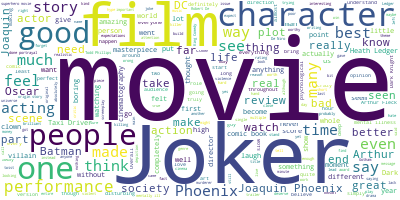

In [ ]:
from wordcloud import WordCloud
long_string = ','.join(list(reviews.values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = reviews.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
print(data_words[:5][0:5][:30])

[['outstanding', 'movie', 'haunting', 'performance', 'best', 'character', 'development'], ['every', 'movie', 'comes', 'truly', 'makes', 'impact', 'joaquin', 'performance', 'scenography', 'brilliance', 'grotesque', 'haunting', 'cringy', 'hard', 'watch', 'times', 'mesmerizing', 'blink', 'eye', 'watching', 'tragic', 'seriously', 'funny', 'moments', 'emotional', 'rollercoaster', 'sometimes', 'multiple', 'emotions', 'popping', 'time', 'far', 'typical', 'action', 'riddled', 'predictable', 'super', 'hero', 'movie', 'proper', 'psychological', 'thriller', 'drama', 'single', 'best', 'character', 'development', 'ever', 'seen'], ['movie', 'felt', 'alone', 'isolated', 'truly', 'relate', 'understand', 'motive', 'feel', 'sorry', 'character', 'lot', 'people', 'see', 'movie', 'think', 'encourages', 'violence', 'truly', 'movie', 'encourage', 'every', 'one', 'us', 'become', 'better', 'person', 'treat', 'everyone', 'respect', 'make', 'feel', 'like', 'belong', 'world', 'instead', 'making', 'feel', 'isolate

In [ ]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:5][0:5][:30])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1)], [(1, 1), (4, 3), (16, 1), (45, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 3), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1)], [(0, 3), (25, 1), (28, 1), (45, 2), (63, 1), (65, 1), (66, 4), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 2), (93, 1), (94, 1), (95

In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.020*"joker" + 0.018*"movie" + 0.009*"like" + 0.007*"phoenix" + '
  '0.006*"character" + 0.005*"good" + 0.005*"even" + 0.004*"would" + '
  '0.004*"many" + 0.004*"people"'),
 (1,
  '0.013*"movie" + 0.011*"phoenix" + 0.010*"joaquin" + 0.009*"one" + '
  '0.009*"joker" + 0.006*"like" + 0.006*"best" + 0.005*"film" + '
  '0.005*"performance" + 0.004*"made"'),
 (2,
  '0.016*"movie" + 0.010*"film" + 0.010*"joker" + 0.008*"great" + 0.008*"good" '
  '+ 0.007*"one" + 0.007*"way" + 0.006*"phoenix" + 0.005*"plot" + '
  '0.005*"acting"'),
 (3,
  '0.015*"movie" + 0.013*"film" + 0.007*"get" + 0.006*"joker" + 0.006*"one" + '
  '0.006*"see" + 0.005*"plot" + 0.005*"character" + 0.005*"acting" + '
  '0.005*"mental"'),
 (4,
  '0.028*"movie" + 0.021*"joker" + 0.008*"character" + 0.007*"one" + '
  '0.007*"like" + 0.006*"joaquin" + 0.006*"phoenix" + 0.006*"film" + '
  '0.006*"even" + 0.006*"performance"'),
 (5,
  '0.037*"movie" + 0.023*"joker" + 0.009*"like" + 0.008*"people" + '
  '0.008*"phoenix" + 

**Summarize and describe the topic for each cluster**

1. joker, movie, like, phoenix, character, good, even, would, many, people
2.   movie, phoenix, joaquin, one, joker, like, best, film, performance, made
3. movie, film, joker, great, good, one, way, phoenix, plot, acting
4. movie, film, get, joker, one, see, plot, character, acting, mental
5. movie, joker, character, one, like, joaquin, phoenix, film, even, performance
6. movie, joker, like, people, phoenix, film, character, joaquin, better, one
7. movie, film, phoenix, joker, character, time, say, like, performance, story
8. joker, movie, film, phoenix, character, good, one, would, masterpiece, story
9. movie, joker, film, character, joaquin, like, also, would, phoenix, people
10. joker, movie, film, character, people, feel, good, one, phoenix, could



# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
# Write your code here
df = pd.read_csv('/content/clean_reviews.csv')
df

,Review,Sentiment
0,"Every movie comes, truly makes impact. Joaquin...",Positive
1,This movie felt alone isolated truly relate it...,Positive
2,"Truly masterpiece, The Best Hollywood film 201...",Positive
3,Joaquin Phoenix gives tour de force performanc...,Positive
4,Most time movies anticipated like end falling ...,Positive
...,...,...
95,"Heath great dark Knight, even liked Jared Leto...",Neutral
96,I excited movie came theaters raving reviews I...,Positive
97,There homage borrowing wholesale material. Thi...,Neutral
98,Disturbing. Just got movie. My humor much bett...,Neutral


In [ ]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

from sklearn.feature_extraction.text import TfidfVectorizer
td = TfidfVectorizer(max_features = 4500)
X = td.fit_transform(X).toarray()

# Splitting into training & test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 0)

# Training the classifier & predicting on test data
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Classification metrics
from sklearn.metrics import accuracy_score, classification_report
classification_report = classification_report(y_test, y_pred)

print('\n Accuracy using Multinomial navie bayes: ', accuracy_score(y_test, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)


 Accuracy using Multinomial navie bayes:  0.4

Classification Report

               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         7
     Neutral       0.00      0.00      0.00         4
    Positive       0.42      0.89      0.57         9

    accuracy                           0.40        20
   macro avg       0.14      0.30      0.19        20
weighted avg       0.19      0.40      0.26        20



In [ ]:
from sklearn.svm import LinearSVC
svm_classifier=LinearSVC()
svm_classifier.fit(X_train,y_train)
y_pred=svm_classifier.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
classification_report=classification_report(y_test,y_pred)
print('\n Accuracy using support vector machine: ', accuracy_score(y_test, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)


 Accuracy using support vector machine:  0.55

Classification Report

               precision    recall  f1-score   support

    Negative       1.00      0.14      0.25         7
     Neutral       0.33      0.50      0.40         4
    Positive       0.62      0.89      0.73         9

    accuracy                           0.55        20
   macro avg       0.65      0.51      0.46        20
weighted avg       0.69      0.55      0.49        20



I selected features in the dataset using tf-idf matrix becuase tf-idf converts text into numerical array of frequency which means term frequency says how frequently does a word appeared in a document and inverse document frequency says how frequently does the word appears across all others in the dataset and also as this is the easiest way to find out the important terms and to concnetrate on these terms.
This is important becuase the values in the tfidf matrix are like weights which are added to the terms according to their occurence and importance which makes a model to identify which is more important for a particular sentiment and tends to predict the sentiment of a sentence easily.

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

train=pd.read_csv('/content/train.csv')
test=pd.read_csv("/content/test.csv")
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

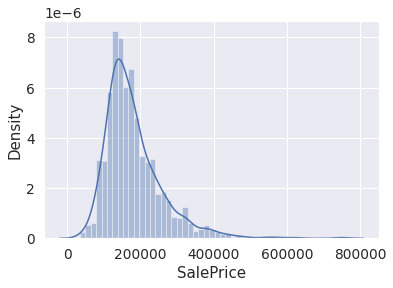

In [ ]:
sns.distplot(train['SalePrice'])

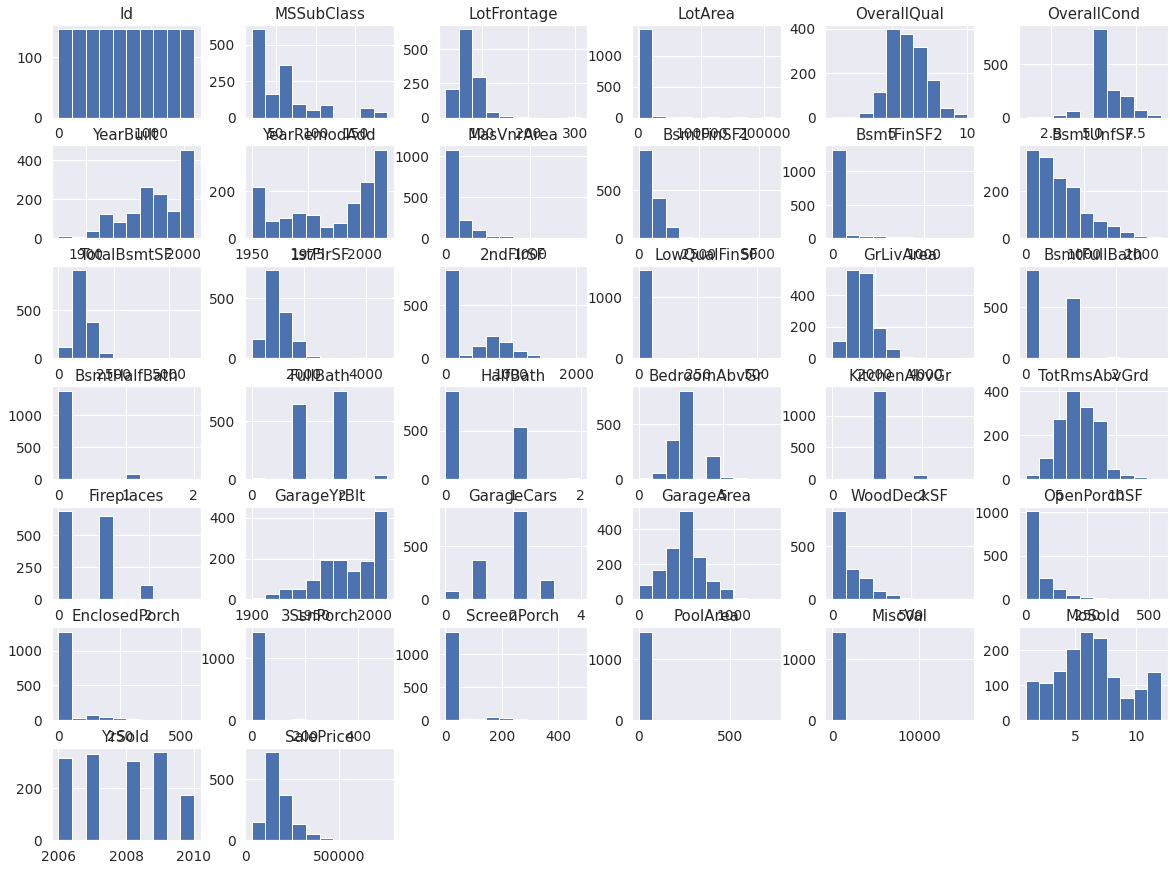

In [ ]:
train.hist(bins=10, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [ ]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [ ]:
train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max()

0

In [ ]:
correlation=train.corr()
correlation["SalePrice"].sort_values()

KitchenAbvGr    -0.135935
EnclosedPorch   -0.128627
MSSubClass      -0.084230
OverallCond     -0.077924
YrSold          -0.028907
LowQualFinSF    -0.025620
Id              -0.021756
MiscVal         -0.021200
BsmtHalfBath    -0.016873
BsmtFinSF2      -0.011412
3SsnPorch        0.044571
MoSold           0.046380
PoolArea         0.092397
ScreenPorch      0.111419
BedroomAbvGr     0.168235
BsmtUnfSF        0.214446
BsmtFullBath     0.227082
LotArea          0.263837
HalfBath         0.284400
OpenPorchSF      0.315831
2ndFlrSF         0.319464
WoodDeckSF       0.324422
BsmtFinSF1       0.386436
Fireplaces       0.466968
YearRemodAdd     0.507430
YearBuilt        0.523273
TotRmsAbvGrd     0.533779
FullBath         0.560881
1stFlrSF         0.605968
TotalBsmtSF      0.613905
GarageArea       0.623423
GarageCars       0.640473
GrLivArea        0.708618
OverallQual      0.791069
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [ ]:
X=train[['BsmtFinSF1','Fireplaces','YearRemodAdd','YearBuilt','TotRmsAbvGrd','FullBath','1stFlrSF','TotalBsmtSF','GarageArea','GarageCars','GrLivArea','OverallQual']]
Y=train[['SalePrice']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": 0.8345


In [ ]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [ ]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageQual,78,0.053461
GarageFinish,78,0.053461
GarageCond,78,0.053461


In [ ]:
test = test.drop((missing_data[missing_data['Total'] > 1]).index,1)
test = test.drop(train.loc[train['Electrical'].isnull()].index)
test.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      1
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       1
GarageArea       1
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal     

In [ ]:
test.fillna(test.mean(),inplace=True)
test.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      1
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal     

In [ ]:
testing = test[['BsmtFinSF1','Fireplaces','YearRemodAdd','YearBuilt','TotRmsAbvGrd','FullBath','1stFlrSF','TotalBsmtSF','GarageArea','GarageCars','GrLivArea','OverallQual']]

In [ ]:
y_pred=regressor.predict(testing)
y_pred

array([[109151.32987903],
       [156307.96020738],
       [178217.13349453],
       ...,
       [174296.62395203],
       [104192.34287174],
       [252691.08714594]])

In [ ]:
prediction = pd.DataFrame(data=y_pred)
prediction

,0
0,109151.329879
1,156307.960207
2,178217.133495
3,196542.703504
4,211503.482402
...,...
1454,61033.952479
1455,83977.668841
1456,174296.623952
1457,104192.342872
